<div style='background-color:orange'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align:center ; top-padding:5px'>
        Table of Contents
    </h1></i></u></b>
    <li><a href='#imports'>Imports</a>
    <li><a href='#identifycols'>Identify Columns For Exploration</a>
    <li><a href='#questions'>Questions to Answer</a>
    <li><a href='#misc'>Miscellaneous</a>
    </li>
</div>

<div style='background-color:orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Imports
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>

In [1]:
# Vectorization & Dataframe
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# stats
from scipy import stats

# datetime
from datetime import time

# .py files
import wrangle as w

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set default matplotlib plot style to 'bmh'
mpl.style.use('bmh')

<div style='background-color:orange'>
<a id='identifycols'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Identify Columns For Exploration
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>

In [3]:
# Get the master filtered dataset
master = pd.read_csv('new_svcs.csv')
master.head(3)

,crash_id,$1000_damage_to_any_one_person's_property,active_school_zone_flag,adjusted_average_daily_traffic_amount,adjusted_percentage_of_average_daily_traffic_for_trucks,adjusted_roadway_part,agency,at_intersection_flag,average_daily_traffic_amount,average_daily_traffic_year,...,vehicle_travel_direction,charge,citation,person_age,person_ethnicity,person_gender,person_helmet,person_injury_severity,person_type,physical_location_of_an_occupant
0,16189632,No,NO,no data,no data,1 - MAIN/PROPER LANE,"DEPARTMENT OF PUBLIC SAFETY, STATE OF TEXAS",False,no data,no data,...,N - NORTH,OPERATE UNREGISTERED MOTOR VEHICLE,TX52Q80UKZPL,37,W - WHITE,1 - MALE,1 - NOT WORN,A - SUSPECTED SERIOUS INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER
1,16203470,No,NO,no data,no data,1 - MAIN/PROPER LANE,"DEPARTMENT OF PUBLIC SAFETY, STATE OF TEXAS",False,no data,no data,...,N - NORTH,"NO CLASS ""M"" LICENSE",TX52QD0NAP34,30,H - HISPANIC,1 - MALE,"3 - WORN, NOT DAMAGED",C - POSSIBLE INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER
2,16191458,Yes,NO,no data,no data,1 - MAIN/PROPER LANE,WILLIAMSON COUNTY SHERIFF'S OFFICE,False,no data,no data,...,UNK - UNKNOWN,ACCIDENT INVOLVING DAMAGE TO VEHICLE>=$200/ FS...,2018-01-00170,20,W - WHITE,1 - MALE,99 - UNKNOWN IF WORN,99 - UNKNOWN,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER


In [4]:
# Columns for exploration
crash_conditions_cols=[
    'crash_id',
    'person_injury_severity',
    'crash_date',
    'crash_month',
    'crash_time',
    'crash_year',
    'day_of_week',
    'weather_condition',
    'light_condition',
    'surface_condition',
    'contributing_factor_1',
    'contributing_factor_2',
    'contributing_factor_3',
    'possible_contributing_factor_1',
    'possible_contributing_factor_2',
    'other_factor',
    'intersection_related',
    'manner_of_collision',
    'object_struck',
    'roadway_alignment',
    'roadway_relation',
    'roadway_type',
    'speed_limit'
]

In [8]:
# Split data
crash_df, validate, test = w.split(master)

<div style='background-color:orange'>
<a id='Questions'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Questions to Answer
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    <li><a href='#question1'>Question 1</a>
    <li><a href='#question2'>Question 2</a>
    <li><a href='#question3'>Question 3</a>
    <li><a href='#question4'>Question 4</a>
    </li>
</div>

<a id='questionsorientation'></a>
<h3><b><i>
    Questions Orientation
</i></b></h3>
<li><a href='#questions'>Questions to Answer Top</a></li>

- TOPIC: Crash Conditions
    1. Does Time of Day Matter?
    2. Does Day of Week Matter?
    3. Does Weather Matter?
    4. Do Intersections Matter?

---

<a id='question1'></a>
<h3><b><i>
    Question 1
</i></b></h3>
<li><a href='#questions'>Questions to Answer Top</a></li>

1. Does time of day matter?

<b>H$_0$:</b> The time of day does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The time of day does make a significant difference in the injury severity of single motorcycle crashes in Texas.

In [9]:
# Fix 'crash_time' column
times_list = crash_df.crash_time.astype(str).to_list()
fixed_times_list = []
for val in times_list:
    if len(val) == 1:
        val = '000' + val
    elif len(val) == 2:
        val = '00' + val
    elif len(val) == 3:
        val = '0' + val
    fixed_times_list.append(val)

In [10]:
# Replace unclean column with clean version and create datetime column
crash_df.crash_time = fixed_times_list
crash_df['crash_datetime'] = crash_df.crash_date.str.strip() + ' ' + crash_df.crash_time
crash_df.crash_datetime = pd.to_datetime(crash_df.crash_datetime)

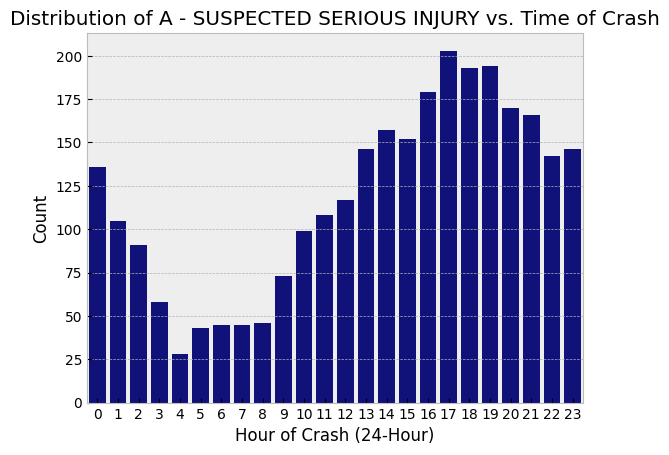

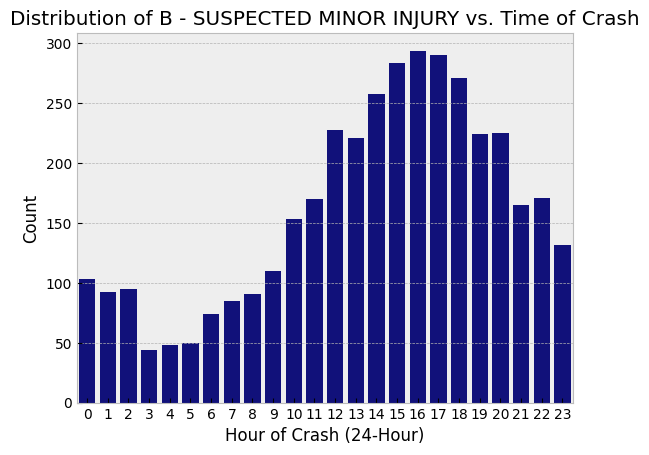

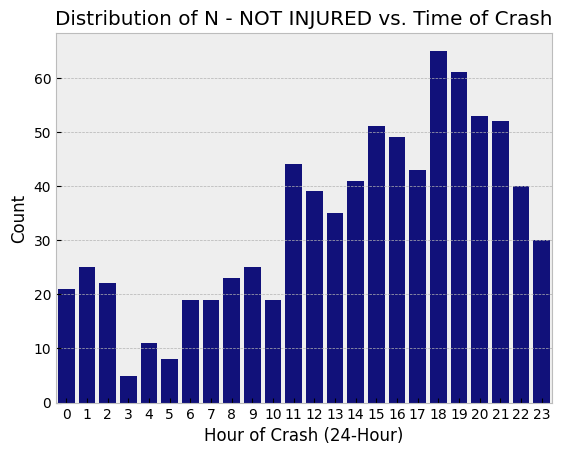

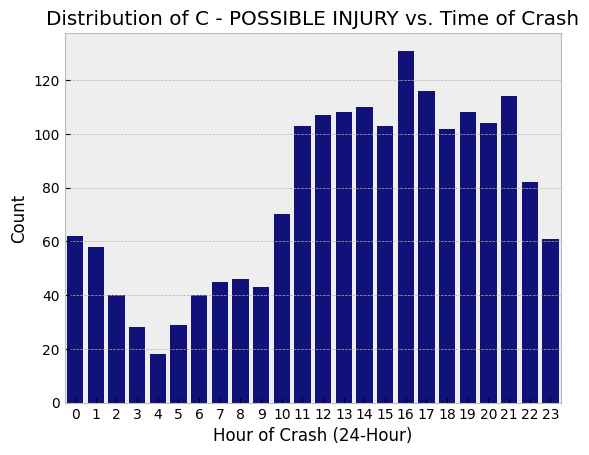

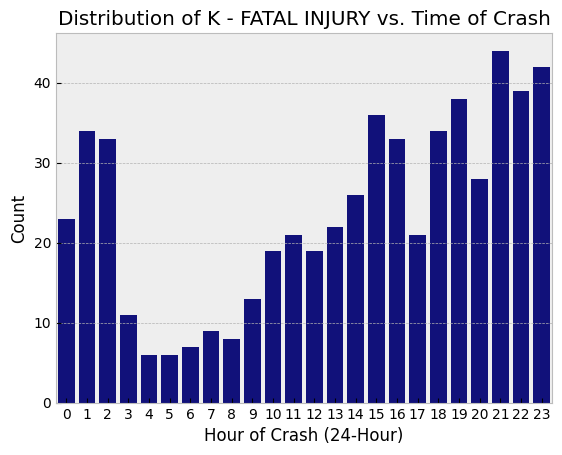

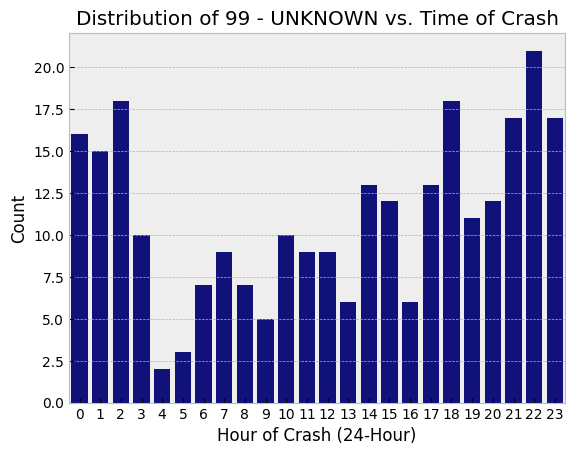

In [11]:
# Visualize injury severity by time of day
for val in crash_df.person_injury_severity.unique():
    hour_counts = crash_df[crash_df.person_injury_severity == val].groupby(by=crash_df.crash_datetime.dt.hour)['person_injury_severity'].count()
    sns.barplot(x=hour_counts.index, y=hour_counts, color='darkblue')
    plt.title(f'Distribution of {val} vs. Time of Crash')
    plt.xlabel('Hour of Crash (24-Hour)')
    plt.ylabel('Count')
    plt.show()

In [12]:
# Stat test variables using a chi2_contingency test
for val in crash_df.person_injury_severity.unique():
    observed = pd.crosstab(crash_df.crash_datetime.dt.hour, crash_df.person_injury_severity == val)
    stat, p, dof, a = stats.chi2_contingency(observed)
    alpha = 0.05
    if p < 0.05:
        print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35m{val}\nStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
    else:
        print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35m{val}\nStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== REJECT NULL HYPOTHESIS ==========
A - SUSPECTED SERIOUS INJURY
Statistic: 73.00320056738663
P-Value: 4.1450727025213574e-07

========== REJECT NULL HYPOTHESIS ==========
B - SUSPECTED MINOR INJURY
Statistic: 114.06026788583223
P-Value: 4.8091506975020827e-14

========== ACCEPT NULL HYPOTHESIS ==========
N - NOT INJURED
Statistic: 32.075455061350894
P-Value: 0.09858434323103155

========== REJECT NULL HYPOTHESIS ==========
C - POSSIBLE INJURY
Statistic: 35.298128526475566
P-Value: 0.04857478539970557

========== REJECT NULL HYPOTHESIS ==========
K - FATAL INJURY
Statistic: 80.46868015008752
P-Value: 2.6656540622880677e-08

========== REJECT NULL HYPOTHESIS ==========
99 - UNKNOWN
Statistic: 66.45066601868274
P-Value: 4.240897234385996e-06



<b><i>
    REJECT NULL HYPOTHESIS!
</i></b>

The time of day does make a significant difference in the injury severity of single motorcycle crashes in Texas.

---

<a id='question2'></a>
<h3><b><i>
    Question 2
</i></b></h3>
<li><a href='#questions'>Questions to Answer Top</a></li>

2. Does day of week matter?

<b>H$_0$:</b> The day of week does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The day of week does make a significant difference in the injury severity of single motorcycle crashes in Texas.

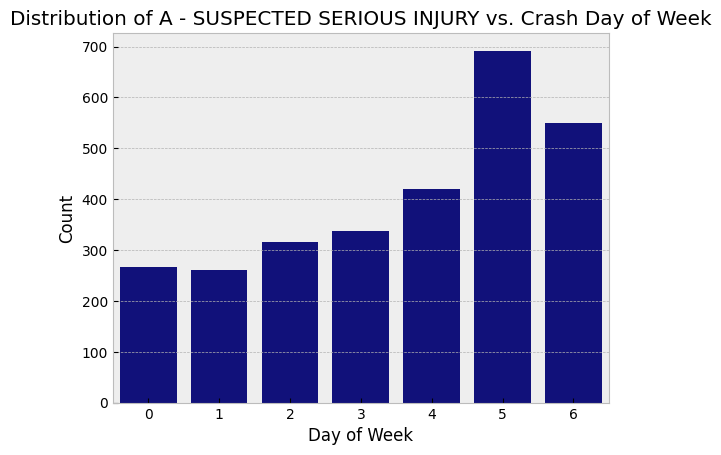

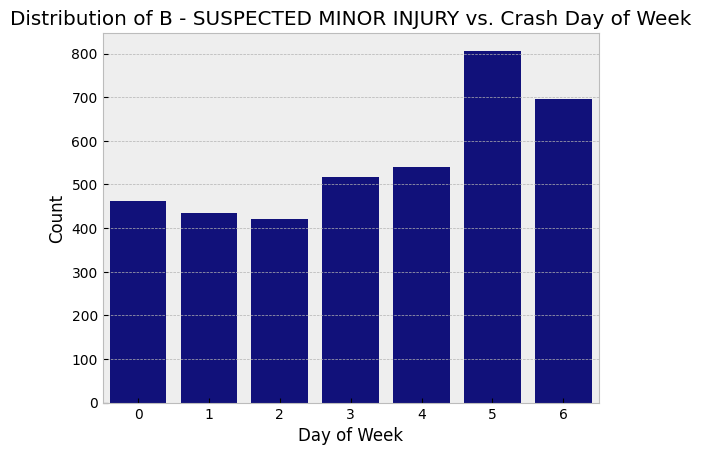

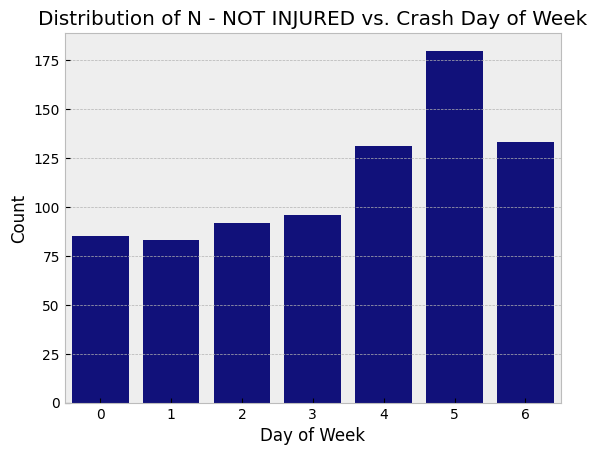

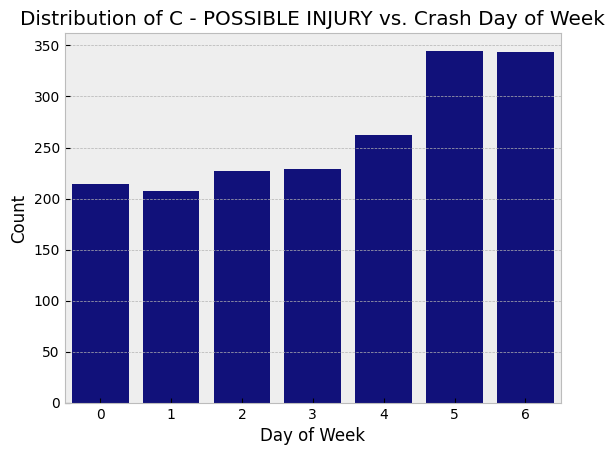

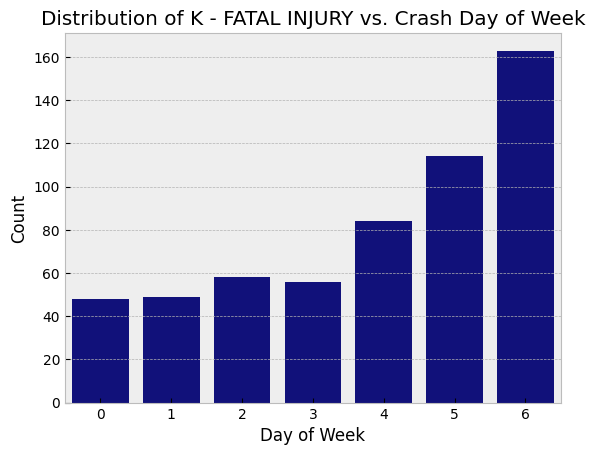

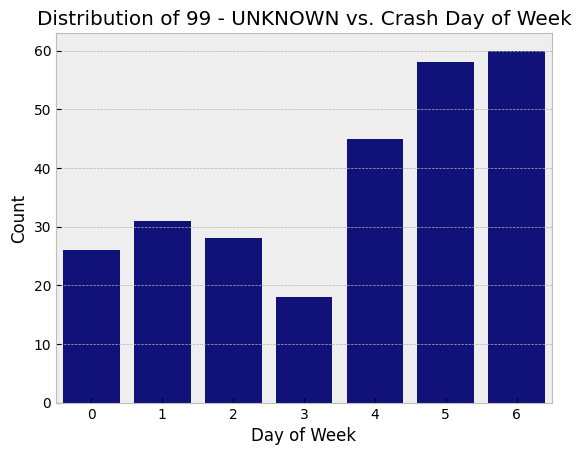

In [13]:
# Visualize injury severity by day of week
for val in crash_df.person_injury_severity.unique():
    dayofweek_counts = crash_df[crash_df.person_injury_severity == val].groupby(by=crash_df.crash_datetime.dt.dayofweek)['person_injury_severity'].count()
    sns.barplot(x=dayofweek_counts.index, y=dayofweek_counts, color='darkblue')
    plt.title(f'Distribution of {val} vs. Crash Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Count')
    plt.show()

In [14]:
# Stat test variables using a chi2_contingency test
for val in crash_df.person_injury_severity.unique():
    observed = pd.crosstab(crash_df.crash_datetime.dt.dayofweek, crash_df.person_injury_severity == val)
    stat, p, dof, a = stats.chi2_contingency(observed)
    alpha = 0.05
    if p < 0.05:
        print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35m{val}\nStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
    else:
        print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35m{val}\nStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== REJECT NULL HYPOTHESIS ==========
A - SUSPECTED SERIOUS INJURY
Statistic: 28.567319960136786
P-Value: 7.344551401440862e-05

========== REJECT NULL HYPOTHESIS ==========
B - SUSPECTED MINOR INJURY
Statistic: 23.945172481019018
P-Value: 0.0005345250024347775

========== ACCEPT NULL HYPOTHESIS ==========
N - NOT INJURED
Statistic: 5.332811141967581
P-Value: 0.5018894318844809

========== REJECT NULL HYPOTHESIS ==========
C - POSSIBLE INJURY
Statistic: 13.75401117858665
P-Value: 0.032508007117807984

========== REJECT NULL HYPOTHESIS ==========
K - FATAL INJURY
Statistic: 37.959753057417785
P-Value: 1.143895956494605e-06

========== ACCEPT NULL HYPOTHESIS ==========
99 - UNKNOWN
Statistic: 10.399415157053248
P-Value: 0.10880846228869809



<b><i>
    REJECT NULL HYPOTHESIS FOR SOME!
</i></b>

The day of week does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

(Only reject for possible, suspected minor/major, and fatal injuries)

---

<a id='question3'></a>
<h3><b><i>
    Question 3
</i></b></h3>
<li><a href='#questions'>Questions to Answer Top</a></li>

3. Does weather matter?

<b>H$_0$:</b> The weather does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The weather does make a significant difference in the injury severity of single motorcycle crashes in Texas.

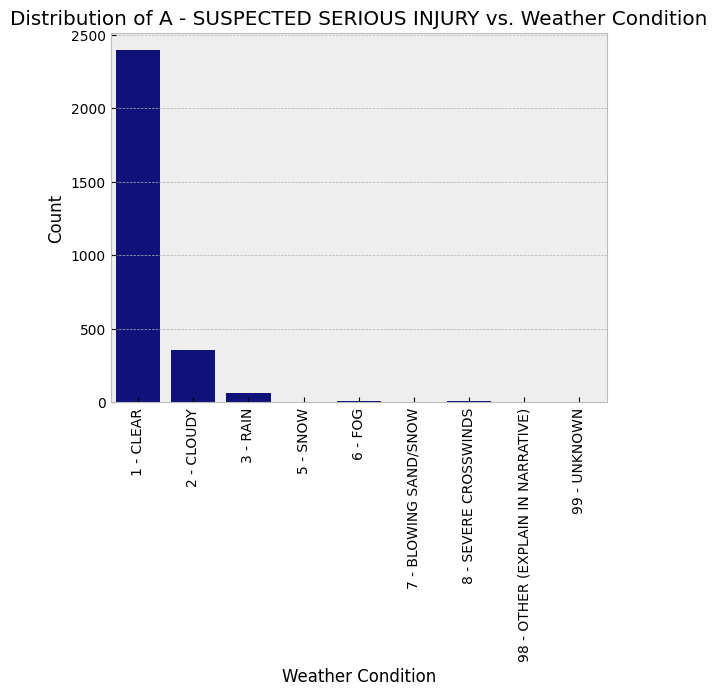

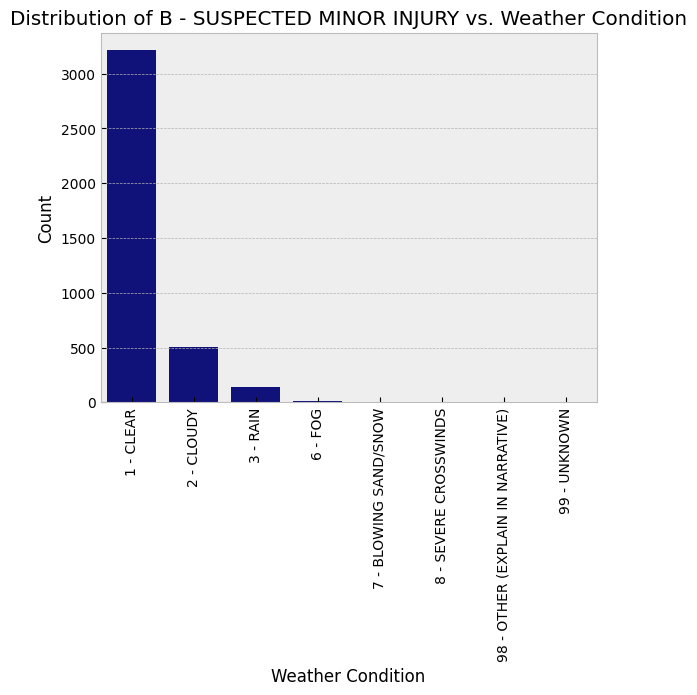

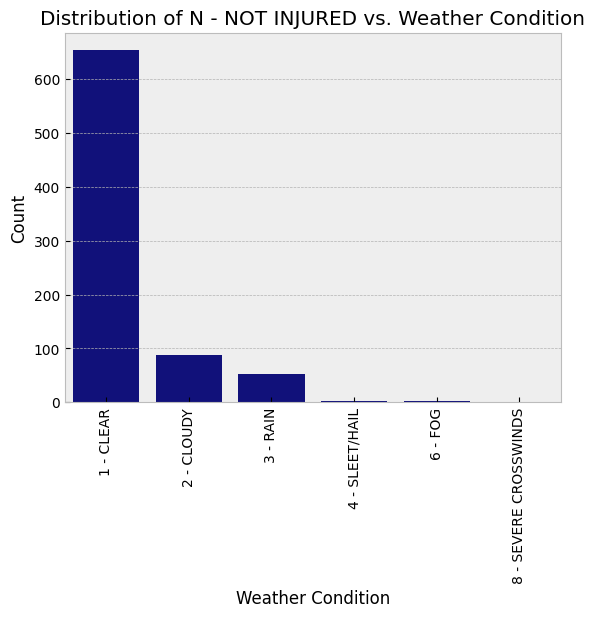

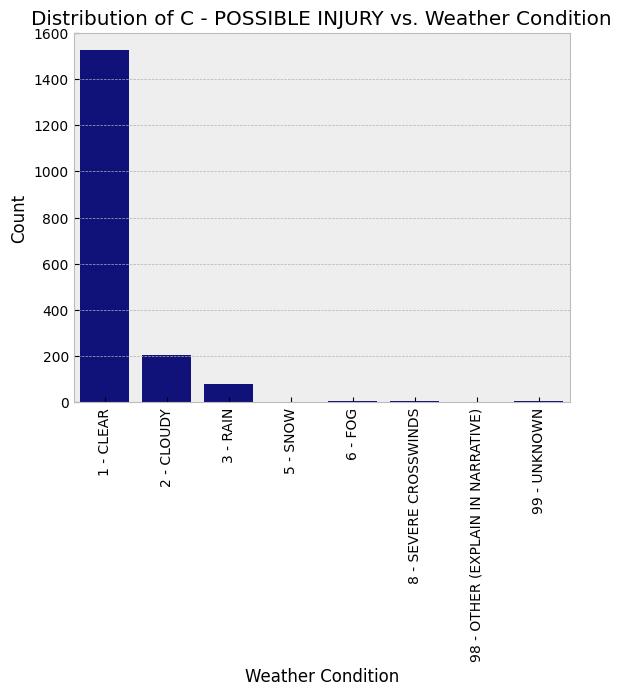

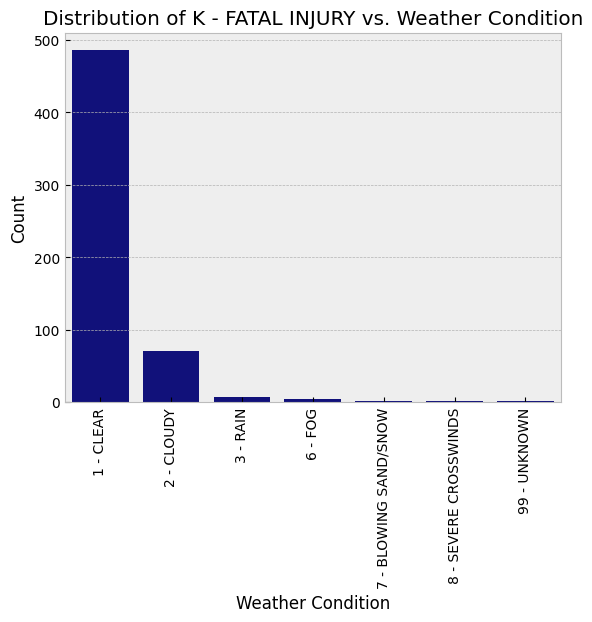

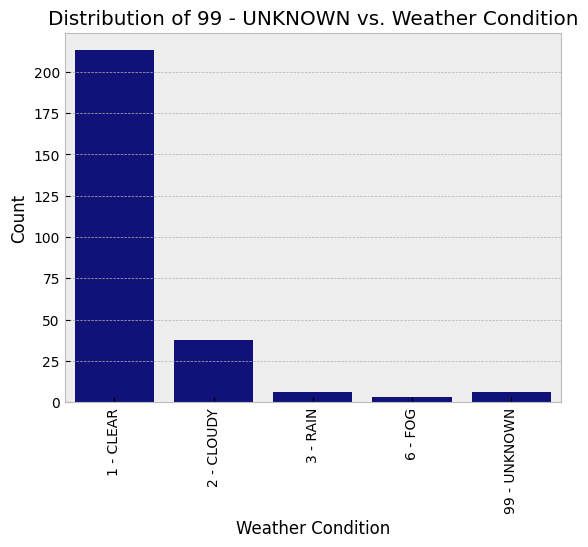

In [15]:
# Visualize injury severity by weather condition
for val in crash_df.person_injury_severity.unique():
    weather_counts = crash_df[crash_df.person_injury_severity == val].groupby('weather_condition')['person_injury_severity'].count()
    sns.barplot(x=weather_counts.index, y=weather_counts, color='darkblue')
    plt.title(f'Distribution of {val} vs. Weather Condition')
    plt.xlabel('Weather Condition')
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.show()

In [21]:
# Stat test variables using a chi2_contingency test
for val in crash_df.person_injury_severity.unique():
    for vals in crash_df.weather_condition.unique():
        observed = pd.crosstab(crash_df.weather_condition == vals, crash_df.person_injury_severity == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35m{vals} vs. {val}\nStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35m{vals} vs. {val}\nStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== ACCEPT NULL HYPOTHESIS ==========
1 - CLEAR vs. A - SUSPECTED SERIOUS INJURY
Statistic: 2.575911648769526
P-Value: 0.10850157611419864

========== ACCEPT NULL HYPOTHESIS ==========
2 - CLOUDY vs. A - SUSPECTED SERIOUS INJURY
Statistic: 0.13830040223658474
P-Value: 0.7099765226238026

========== ACCEPT NULL HYPOTHESIS ==========
6 - FOG vs. A - SUSPECTED SERIOUS INJURY
Statistic: 0.34398014757724854
P-Value: 0.5575407656427157

========== ACCEPT NULL HYPOTHESIS ==========
98 - OTHER (EXPLAIN IN NARRATIVE) vs. A - SUSPECTED SERIOUS INJURY
Statistic: 0.0
P-Value: 1.0

========== REJECT NULL HYPOTHESIS ==========
3 - RAIN vs. A - SUSPECTED SERIOUS INJURY
Statistic: 14.820754865470505
P-Value: 0.0001182271740211239

========== ACCEPT NULL HYPOTHESIS ==========
8 - SEVERE CROSSWINDS vs. A - SUSPECTED SERIOUS INJURY
Statistic: 1.6320839377356655
P-Value: 0.2014150528286591

========== ACCEPT NULL HYPOTHESIS ==========
4 - SLEET/HAIL vs. A - SUSPECTED SERIOUS INJURY
Statistic: 0.008

<b><i>
    ACCEPT NULL HYPOTHESIS FOR MAJORITY!
</i></b>

The weather does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

(Rain passed all levels of injury except minor and unknown levels of injury)

---

<a id='question4'></a>
<h3><b><i>
    Question 4
</i></b></h3>
<li><a href='#questions'>Questions to Answer Top</a></li>

4. Do intersections matter?

<b>H$_0$:</b> Intersections do not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> Intersections do make a significant difference in the injury severity of single motorcycle crashes in Texas.

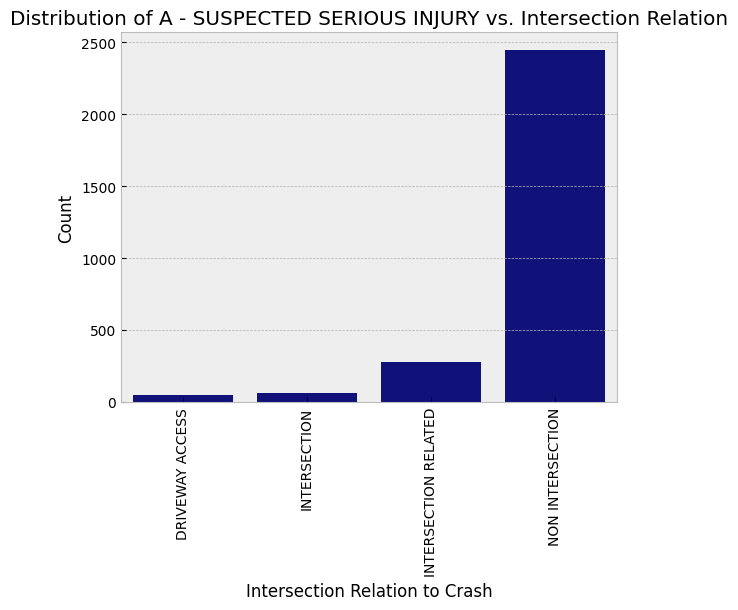

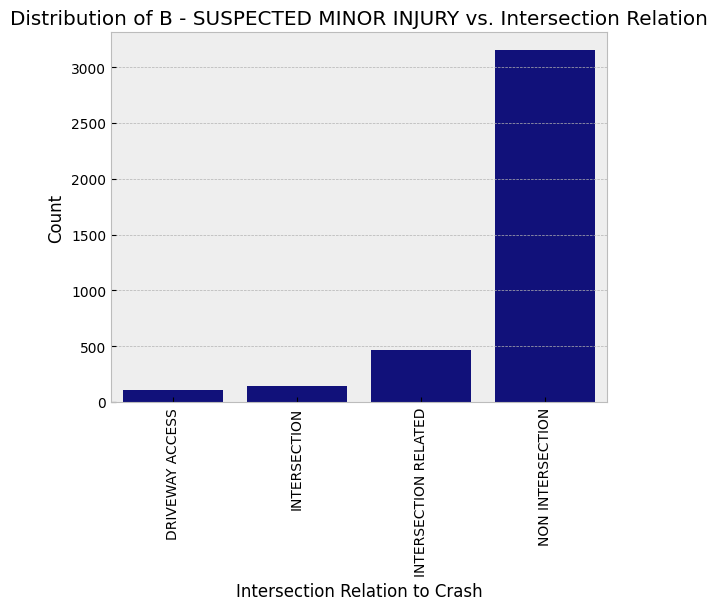

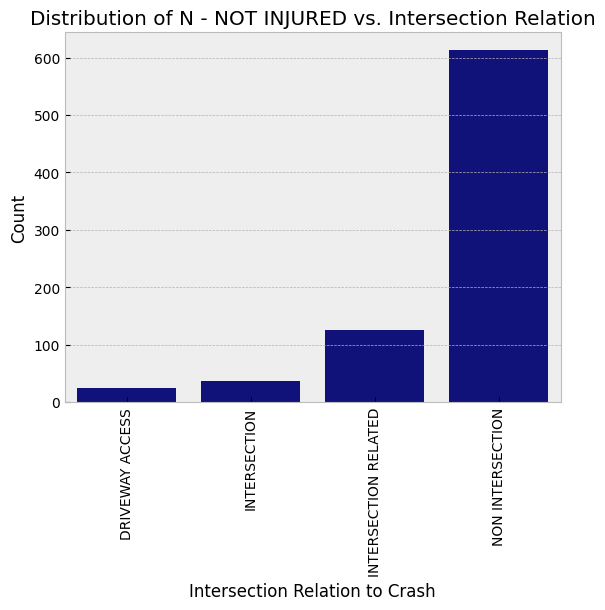

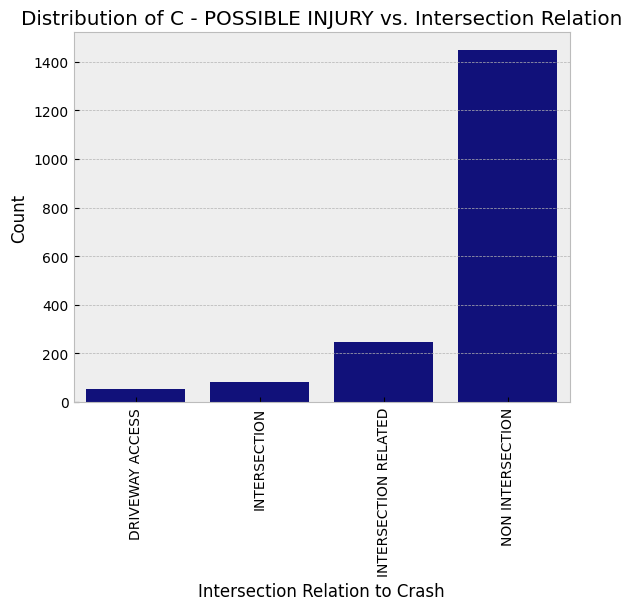

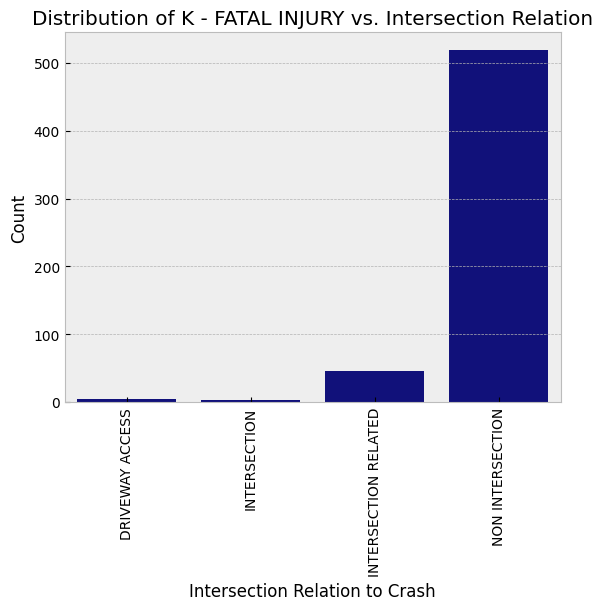

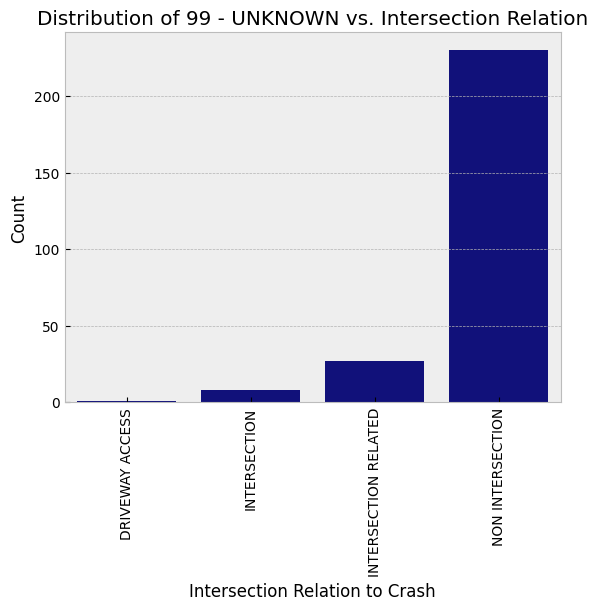

In [19]:
# Visualize injury severity by intersection relation
for val in crash_df.person_injury_severity.unique():
    intersections_counts = crash_df[crash_df.person_injury_severity == val].groupby('intersection_related')['person_injury_severity'].count()
    sns.barplot(x=intersections_counts.index, y=intersections_counts, color='darkblue')
    plt.title(f'Distribution of {val} vs. Intersection Relation')
    plt.xlabel('Intersection Relation to Crash')
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.show()

In [20]:
# Stat test variables using a chi2_contingency test
for val in crash_df.person_injury_severity.unique():
    observed = pd.crosstab(crash_df.intersection_related, crash_df.person_injury_severity == val)
    stat, p, dof, a = stats.chi2_contingency(observed)
    alpha = 0.05
    if p < 0.05:
        print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35m{val}\nStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
    else:
        print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35m{val}\nStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== REJECT NULL HYPOTHESIS ==========
A - SUSPECTED SERIOUS INJURY
Statistic: 36.31011722482445
P-Value: 6.438931513770929e-08

========== REJECT NULL HYPOTHESIS ==========
B - SUSPECTED MINOR INJURY
Statistic: 10.587351455506706
P-Value: 0.014179900266656028

========== REJECT NULL HYPOTHESIS ==========
N - NOT INJURED
Statistic: 21.297061078421365
P-Value: 9.133141144200587e-05

========== REJECT NULL HYPOTHESIS ==========
C - POSSIBLE INJURY
Statistic: 19.586487449444093
P-Value: 0.00020675099395259006

========== REJECT NULL HYPOTHESIS ==========
K - FATAL INJURY
Statistic: 33.4647337750995
P-Value: 2.569801379020377e-07

========== ACCEPT NULL HYPOTHESIS ==========
99 - UNKNOWN
Statistic: 5.785899580970341
P-Value: 0.1225042200080732



<b><i>
    REJECT NULL HYPOTHESIS!
</i></b>

Intersections do not make a significant difference in the injury severity of single motorcycle crashes in Texas.

(Nobody cares about the unknown :D)

<div style='background-color:orange'>
<a id='misc'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Miscellaneous
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>